In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors = {"orange" : "#E69F00", "light_blue" : "#56B4E9",
          "green" : "#009E73", "yellow" : "#F0E442",
          "blue" : "#0072B2", "red" : "#D55E00",
          "pink" : "#CC79A7", "black" : "#000000"}

In [3]:
name = 'weighted.npy'
weighted = np.load(name) - np.min(np.load(name))

In [5]:
# Sector reductions
prodfuncs = ['Leo', 'Str', 'Hal', 'Wea']#, 'Lin']
consumer_facing = ['75','80','85','90','95','100']
industry = ['0','10','20','30','40','50']
retail = ['0',]
other_demand = ['0', '2.5', '5', '7.5', '10', '12.5', '15', '17.5']
tau = ['1', '7', '14', '21', '28', '35']
hiring_firing = ['1', '7', '14', '21', '28', '35']
l2 = ['4','5','6','7','8']

## 1D sensitivity through the optimal parameter set

(array([2]), array([5]), array([1]), array([0]), array([4]), array([2]), array([4]), array([2]))


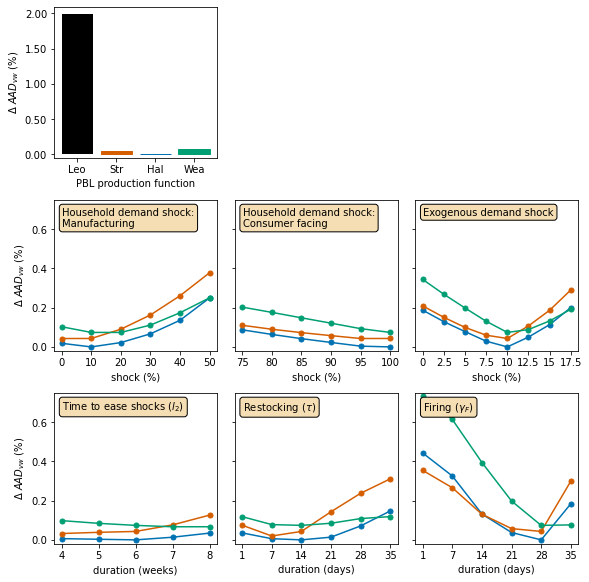

In [10]:
print(np.where(weighted == np.min(weighted)))

fig,ax = plt.subplots(nrows=3, ncols=3, sharey='row', figsize=(8.3, 0.7*11.7))

##################
## PBL Barbplot ##
##################
    
ax[0,0].bar(prodfuncs, weighted[:,5,1,0,4,2,4,2], color='black')
ax[0,0].set_ylabel('$\Delta\ AAD_{vw}$ (%)')
from matplotlib.ticker import FormatStrFormatter
ax[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='white', alpha=1)
#ax[0,0].text(0.05, 0.95, "PBL production function", transform=ax[0,0].transAxes, fontsize=10,
#                verticalalignment='top', bbox=props)
ax[0,0].set_xlabel('PBL production function')
ax[0,0].set_ylim([-0.05,None])

ax[0,0].get_children()[1].set_color(colors['red'])
ax[0,0].get_children()[2].set_color(colors['blue'])
ax[0,0].get_children()[3].set_color(colors['green'])

fig.delaxes(ax[0,1])
fig.delaxes(ax[0,2])

################
## Second row ##
################

ax[1,0].plot(industry, weighted[2,5,:,0,4,2,4,2], marker='o', markersize=5, color=colors['blue'])
ax[1,0].plot(industry, weighted[1,5,:,0,4,2,4,2], marker='o', markersize=5, color=colors['red'])
ax[1,0].plot(industry, weighted[3,5,:,0,4,2,4,2], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,0].text(0.05, 0.95, "Household demand shock:\nManufacturing", transform=ax[1,0].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,0].set_ylabel('$\Delta\ AAD_{vw}$ (%)')
ax[1,0].set_xlabel('shock (%)')

ax[1,1].plot(consumer_facing, weighted[2,:,1,0,4,2,4,2], marker='o', markersize=5, color=colors['blue'])
ax[1,1].plot(consumer_facing, weighted[1,:,1,0,4,2,4,2], marker='o', markersize=5, color=colors['red'])
ax[1,1].plot(consumer_facing, weighted[3,:,1,0,4,2,4,2], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,1].text(0.05, 0.95, "Household demand shock:\nConsumer facing", transform=ax[1,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,1].set_xlabel('shock (%)')

ax[1,2].plot(other_demand, weighted[2,5,1,0,:,2,4,2], marker='o', markersize=5, color=colors['blue'])
ax[1,2].plot(other_demand, weighted[1,5,1,0,:,2,4,2], marker='o', markersize=5, color=colors['red'])
ax[1,2].plot(other_demand, weighted[3,5,1,0,:,2,4,2], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[1,2].text(0.05, 0.95, "Exogenous demand shock", transform=ax[1,2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[1,2].set_xlabel('shock (%)')
ax[1,2].set_ylim([-0.02,0.75])

###############
## Third row ##
###############

ax[2,0].plot(l2, weighted[2,5,1,0,4,2,4,:], marker='o', markersize=5, color=colors['blue'])
ax[2,0].plot(l2, weighted[1,5,1,0,4,2,4,:], marker='o', markersize=5, color=colors['red'])
ax[2,0].plot(l2, weighted[3,5,1,0,4,2,4,:], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,0].text(0.05, 0.95, "Time to ease shocks ($l_2$)", transform=ax[2,0].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,0].set_xlabel('duration (weeks)')
ax[2,0].set_ylabel('$\Delta\ AAD_{vw}$ (%)')

ax[2,1].plot(tau, weighted[2,5,1,0,4,:,4,2], marker='o', markersize=5, color=colors['blue'])
ax[2,1].plot(tau, weighted[1,5,1,0,4,:,4,2], marker='o', markersize=5, color=colors['red'])
ax[2,1].plot(tau, weighted[3,5,1,0,4,:,4,2], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,1].text(0.05, 0.95, "Restocking ($\\tau$)", transform=ax[2,1].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,1].set_xlabel('duration (days)')

ax[2,2].plot(hiring_firing, weighted[2,5,1,0,4,2,:,2], marker='o', markersize=5, color=colors['blue'])
ax[2,2].plot(hiring_firing, weighted[1,5,1,0,4,2,:,2], marker='o', markersize=5, color=colors['red'])
ax[2,2].plot(hiring_firing, weighted[3,5,1,0,4,2,:,2], marker='o', markersize=5, color=colors['green'])
# text box with average euclidian distance in plane
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax[2,2].text(0.05, 0.95, "Firing ($\\gamma_F$)", transform=ax[2,2].transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
ax[2,2].set_xlabel('duration (days)')
ax[2,2].set_ylim([-0.02,0.75])

plt.tight_layout()
fig.savefig('slice_minimum.pdf')
plt.show()
plt.close()

## Restocking, production function and exogenous demand

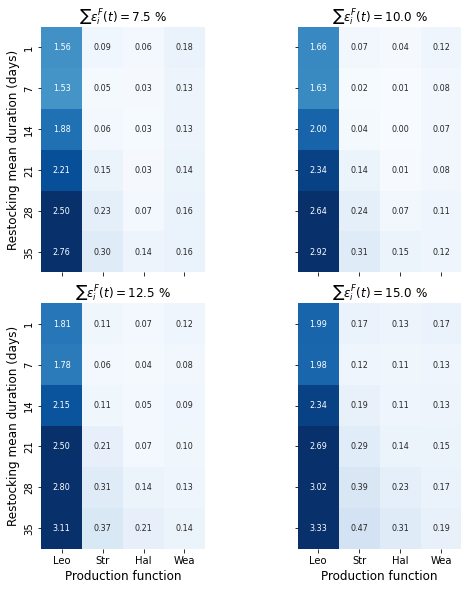

<module 'matplotlib.pyplot' from '/home/twallema/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [8]:
# Extend with exogenous demand (3 panels)

fig,ax=plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8.3,8.3))
    
ax[0,0] = sns.heatmap(np.transpose(weighted[:,5,1,0,3,:,4,2]), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=2.5, cbar=False, ax=ax[0,0], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[0,0].set_ylabel('Restocking mean duration (days)', size=12)
ax[0,0].set_title('$\sum \\epsilon_i^F(t) = 7.5~\%$', size=12)

ax[0,1] = sns.heatmap(np.transpose(weighted[:,5,1,0,4,:,4,2]), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=2.5, cbar=False, ax=ax[0,1], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[0,1].set_title('$\sum \\epsilon_i^F(t) = 10.0~\%$', size=12)


ax[1,0] = sns.heatmap(np.transpose(weighted[:,5,1,0,5,:,4,2]), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=2.5, cbar=False, ax=ax[1,0], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[1,0].set_xlabel('Production function', size=12)
ax[1,0].set_ylabel('Restocking mean duration (days)', size=12)
ax[1,0].set_title('$\sum \\epsilon_i^F(t) = 12.5~\%$', size=12)


ax[1,1].set_xlabel('Production function', size=12)
ax[1,1].set_title('$\sum \\epsilon_i^F(t) = 15.0~\%$', size=12)
ax[1,1] = sns.heatmap(np.transpose(weighted[:,5,1,0,6,:,4,2]), xticklabels=prodfuncs, yticklabels=tau,
                    annot=True, fmt=".2f", vmin=0, vmax=2.5, cbar=False, ax=ax[1,1], square=True, annot_kws={"fontsize": 8},
                    cmap="Blues")
ax[1,1].set_xlabel('Production function', size=12)

plt.tight_layout()
plt.savefig('prodfunc_tau.pdf')
plt.show()
plt

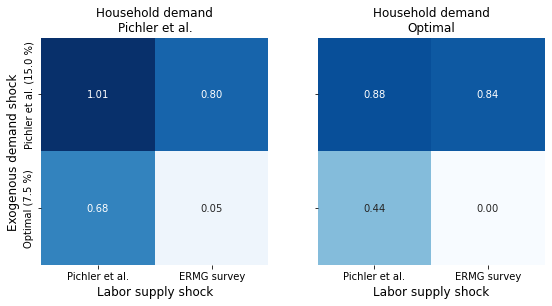

In [5]:
# Raw data
consumer_pichler = np.array([[5.81, 5.60],[5.48, 4.85]])
consumer_optimal = np.array([[5.68, 5.64],[5.24, 4.80]])
# Raw data minus optimum
consumer_pichler -= 4.80
consumer_optimal -= 4.80

fig,ax=plt.subplots(ncols=2,sharey=True, figsize=(8.3,8.3/2))

ax[0] = sns.heatmap(consumer_pichler, xticklabels=['Pichler et al.','ERMG survey'], yticklabels=['Pichler et al. (15.0 %)', 'Optimal (7.5 %)'],
                    annot=True, fmt=".2f", vmin=0, vmax=1, cbar=False, ax=ax[0], square=True, annot_kws={"fontsize": 10},
                    cmap="Blues")
ax[0].set_ylabel('Exogenous demand shock', size=12)
ax[0].set_xlabel('Labor supply shock', size=12)
ax[0].set_title('Household demand\nPichler et al.', size=12)

ax[1] = sns.heatmap(consumer_optimal, xticklabels=['Pichler et al.','ERMG survey'], yticklabels=['Pichler et al. (15.0 %)', 'Optimal (7.5 %)'],
                    annot=True, fmt=".2f", vmin=0, vmax=1, cbar=False, ax=ax[1], square=True, annot_kws={"fontsize": 10},
                    cmap="Blues")
ax[1].set_title('Household demand\nOptimal', size=12)
ax[1].set_xlabel('Labor supply shock', size=12)

plt.tight_layout()
plt.savefig('comparing_shocks.pdf')
plt.show()
plt.close()

## More detailed (legacy)

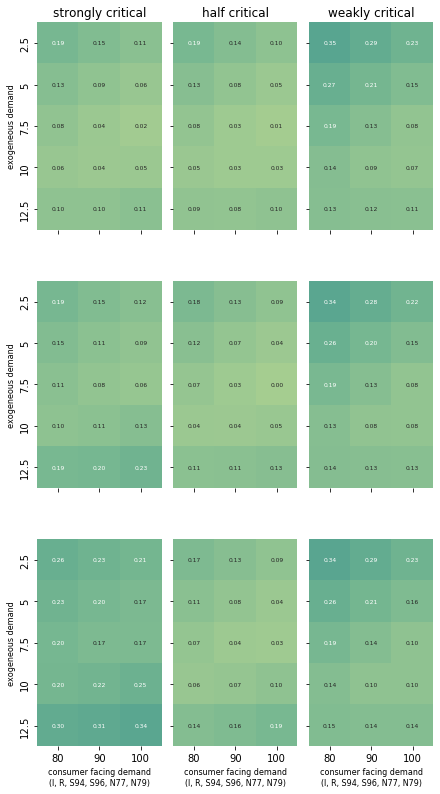

In [65]:
fig,ax=plt.subplots(nrows=len(industry), ncols=3, sharex=True, sharey=True, figsize=(0.75*8.3,11.7))

for i,val in enumerate(tau[0:3]):

    # Column 1
    ax[i,0] = sns.heatmap(np.transpose(weighted[1,:,1,0,:,i,3,2]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False, ax=ax[i,0], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")
    # Column 2
    ax[i,1] = sns.heatmap(np.transpose(weighted[2,:,1,0,:,i,3,2]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False,ax=ax[i,1], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")
    # Column 3
    ax[i,2] = sns.heatmap(np.transpose(weighted[3,:,1,0,:,i,3,2]), xticklabels=consumer_facing, yticklabels=other_demand,
                          annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False,ax=ax[i,2], square=True, annot_kws={"fontsize": 6},
                          cmap="crest")

    ax[i,0].set_ylabel('exogeneous demand', size=8)

cols = ['strongly critical', 'half critical', 'weakly critical']
for axs, col in zip(ax[0,:], cols):
    axs.set_title(col)

ax[-1,0].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
ax[-1,1].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
ax[-1,2].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
 
plt.tight_layout()
plt.savefig(f'sensitivity_analysis_tau.pdf')
plt.show()
plt.close()

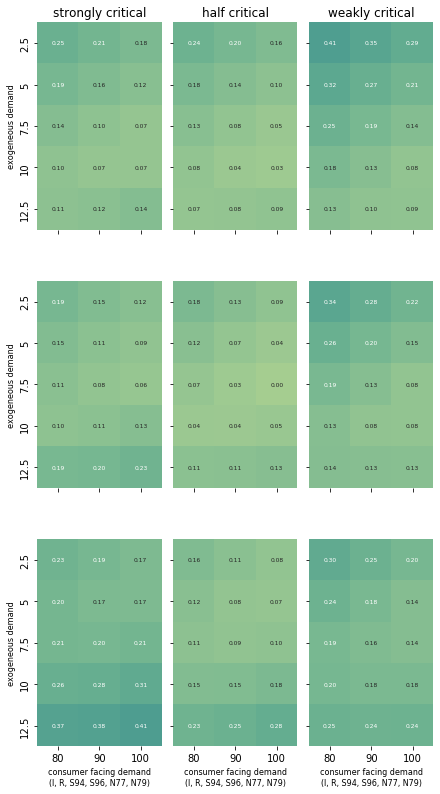

In [63]:
fig,ax=plt.subplots(nrows=len(industry), ncols=3, sharex=True, sharey=True, figsize=(0.75*8.3,11.7))

for i,val in enumerate(industry):

    # Column 1
    ax[i,0] = sns.heatmap(np.transpose(weighted[1,:,i,0,:,1,3,2]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False, ax=ax[i,0], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")
    # Column 2
    ax[i,1] = sns.heatmap(np.transpose(weighted[2,:,i,0,:,1,3,2]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False,ax=ax[i,1], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")
    # Column 3
    ax[i,2] = sns.heatmap(np.transpose(weighted[3,:,i,0,:,1,3,2]), xticklabels=consumer_facing, yticklabels=other_demand,
                            annot=True, fmt=".2f", vmin=0, vmax=1.2, cbar=False,ax=ax[i,2], square=True, annot_kws={"fontsize": 6},
                            cmap="crest")

    ax[i,0].set_ylabel('exogeneous demand', size=8)

cols = ['strongly critical', 'half critical', 'weakly critical']
for axs, col in zip(ax[0,:], cols):
    axs.set_title(col)

ax[-1,0].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
ax[-1,1].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)
ax[-1,2].set_xlabel('consumer facing demand\n(I, R, S94, S96, N77, N79)', size=8)

plt.tight_layout()
plt.savefig(f'sensitivity_analysis_business.pdf')
plt.show()
plt.close()